## 230968364 Week4
### Exercise 1

### • Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to Engine size. 
### • split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value. 
### • Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify the accuracy by calculating Mean absolute error, Residual sum of squares, R2-score and comment on which model is the best.

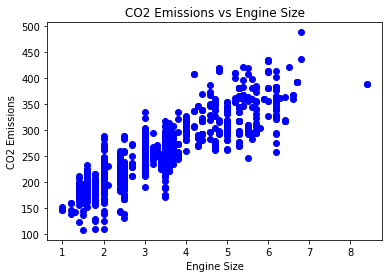

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv("D:\\MIT\\ML\\LAB\\week4\\FuelConsumption.csv")


fuel_data = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

plt.scatter(fuel_data['ENGINESIZE'], fuel_data['CO2EMISSIONS'], color='blue')
plt.title('CO2 Emissions vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

In [3]:
train_data, test_data = train_test_split(fuel_data, test_size=0.3, random_state=42)

X_train = train_data[['ENGINESIZE']]
y_train = train_data['CO2EMISSIONS']
X_test = test_data[['ENGINESIZE']]
y_test = test_data['CO2EMISSIONS']

results={}

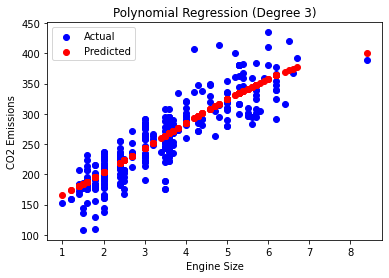

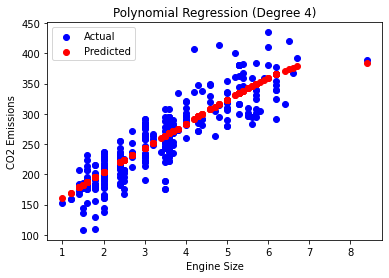

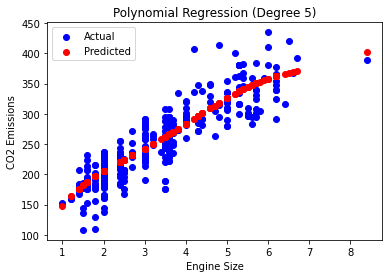

Polynomial Regression Results:
Degree 3 - MAE: 22.803414939307476, RSS: 282246.43996733916, R2: 0.7820074255122681
Degree 4 - MAE: 22.741555356657685, RSS: 282787.44602067367, R2: 0.7815895803752542
Degree 5 - MAE: 22.813403203227345, RSS: 283134.31656621106, R2: 0.7813216754789358


In [4]:
for degree in [3, 4, 5]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    mae = mean_absolute_error(y_test, y_pred)
    rss = np.sum((y_test - y_pred) ** 2)
    r2 = r2_score(y_test, y_pred)
    
    results[degree] = {
        'MAE': mae,
        'RSS': rss,
        'R2': r2,
    }
    
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred, color='red', label='Predicted')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Engine Size')
    plt.ylabel('CO2 Emissions')
    plt.legend()
    plt.show()

print("Polynomial Regression Results:")
for degree, metrics in results.items():
    print(f"Degree {degree} - MAE: {metrics['MAE']}, RSS: {metrics['RSS']}, R2: {metrics['R2']}")